In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv(r"D:\Netflix_Data.csv")

In [75]:
df.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [93]:
df.tail()

,movie_number,season,episodetitle,about,ratings,votes,viewership,duration,date,gueststars,director,writers,scaled_ratings,has_guest
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling,0.43750,False
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein,0.43750,False
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright,0.75000,True
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester,0.90625,False
187,187,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels,1.00000,True


In [76]:
df.shape

(188, 12)

In [77]:
df.describe()

,Unnamed: 0,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


In [79]:
df.isnull().sum()

Unnamed: 0        0
Season            0
EpisodeTitle      0
About             0
Ratings           0
Votes             0
Viewership        0
Duration          0
Date              0
GuestStars      159
Director          0
Writers           0
dtype: int64

In [81]:
df=df.rename(columns={'Unnamed: 0':'movie_number'})

df=df.rename(columns=str.lower)

df['season']=df['season'].astype('category')
df['season']

0      1
1      1
2      1
3      1
4      1
      ..
183    9
184    9
185    9
186    9
187    9
Name: season, Length: 188, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 9]

array([[<Axes: title={'center': 'movie_number'}>,
        <Axes: title={'center': 'ratings'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'viewership'}>],
       [<Axes: title={'center': 'duration'}>, <Axes: >]], dtype=object)

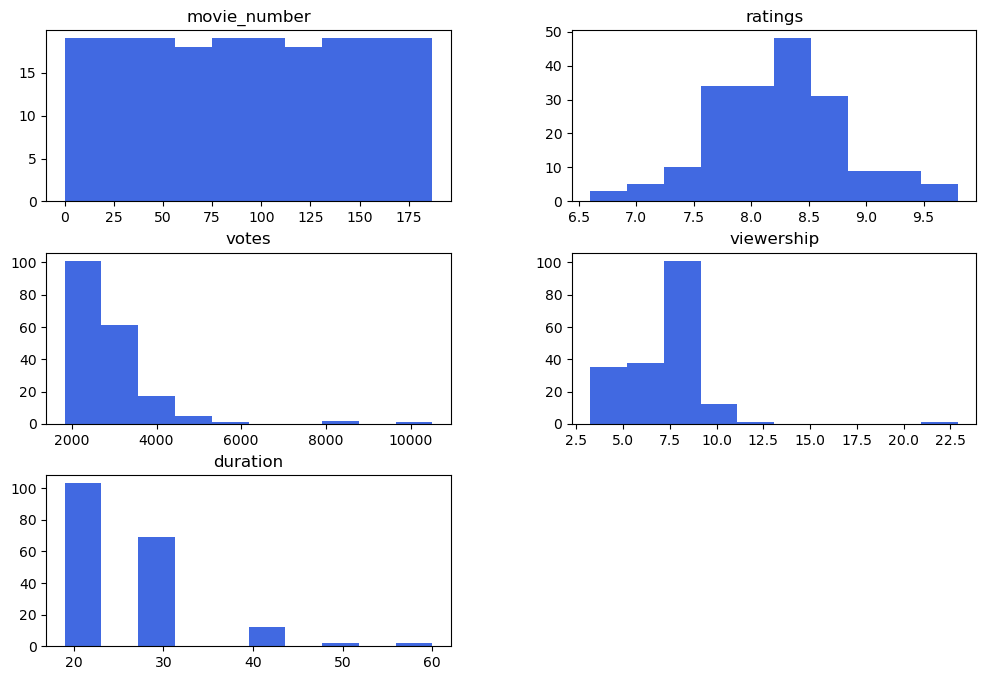

In [82]:
df.hist(grid=False,color='royalblue',figsize=(12,8))

In [83]:
df['scaled_ratings']=df['ratings'].apply(lambda x: (x-min(df['ratings']))/(max(df['ratings'])-min(df['ratings']))) 
df['scaled_ratings'].describe()

count    188.000000
mean       0.511636
std        0.184353
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        1.000000
Name: scaled_ratings, dtype: float64

In [84]:
df['has_guest']=[False if guest else True for guest in df['gueststars'].isna()]

In [85]:
col=[]  
for rating in df['scaled_ratings']:
     if rating<0.25:
        col.append('red')
     elif rating<0.5:
        col.append('orange')
     elif rating<0.75:
        col.append('lightgreen')
     else:         
        col.append('darkgreen')          
size=[250 if guest else 25 for guest in df['has_guest']]

Text(0, 0.5, 'Viewership (Millions)')

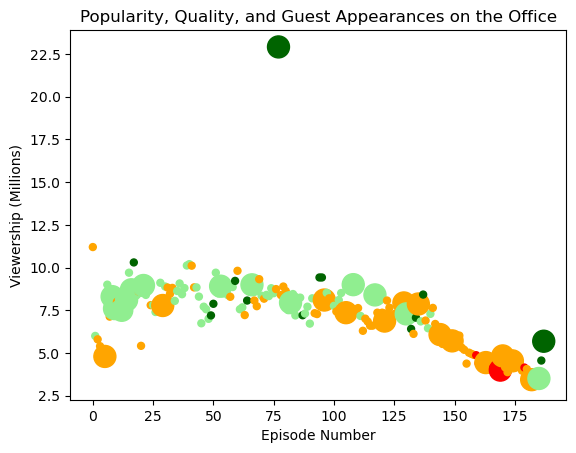

In [87]:
fig=plt.figure() 
plt.scatter(x=df['movie_number'],y=df['viewership'],color=col,s=size) 
plt.title('Popularity, Quality, and Guest Appearances on the Office') 
plt.xlabel('Episode Number') 
plt.ylabel('Viewership (Millions)')

In [88]:
df[df['viewership']==max(df['viewership'])]

,movie_number,season,episodetitle,about,ratings,votes,viewership,duration,date,gueststars,director,writers,scaled_ratings,has_guest
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,1 February 2009,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,0.96875,True


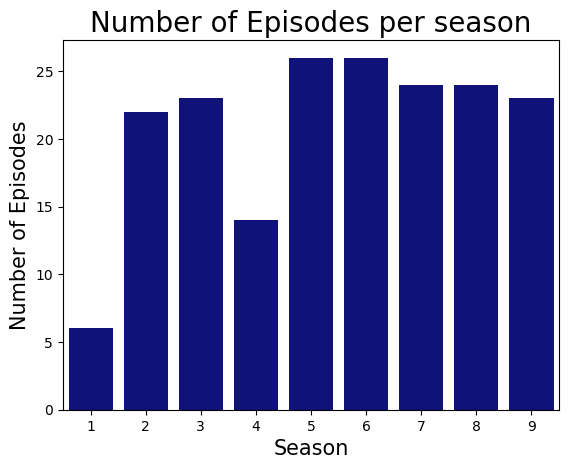

In [89]:
sns.countplot(x='season',data=df,color='darkblue') 
plt.xlabel('Season',fontsize=15) 
plt.ylabel('Number of Episodes',fontsize=15) 
plt.title('Number of Episodes per season',fontsize=20);

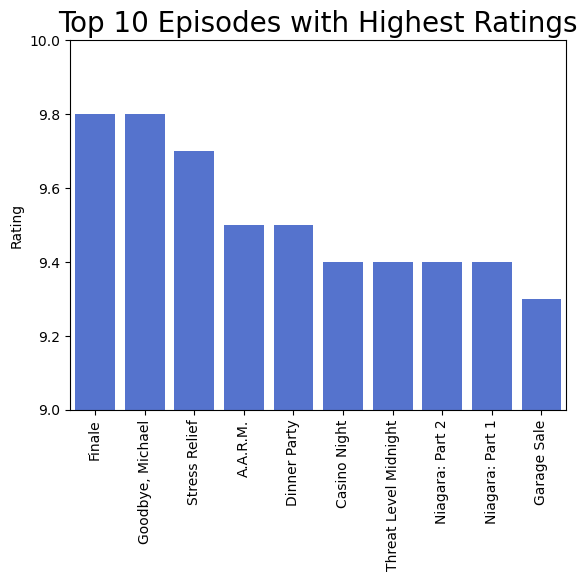

In [90]:
highest_rating=df.sort_values(by='ratings',ascending=False)[['episodetitle','ratings']].iloc[:10,] 
sns.barplot(x='episodetitle',y='ratings',data=highest_rating,color='royalblue') 
plt.title('Top 10 Episodes with Highest Ratings', fontsize=20) 
plt.xlabel('') 
plt.ylabel('Rating') 
plt.ylim(9,10) 
plt.xticks(rotation='vertical');

(3.0, 9.5)

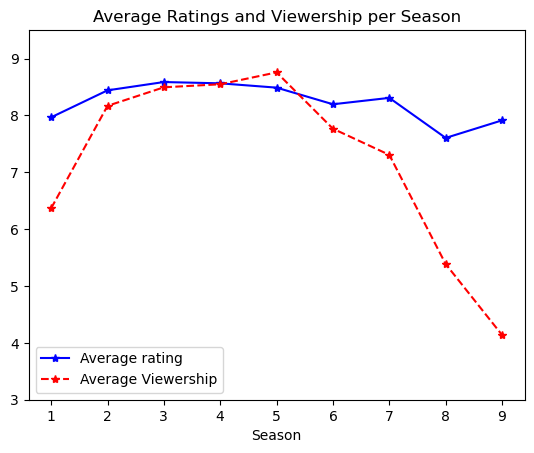

In [91]:
r_v=df.groupby('season')[['ratings','viewership']].mean() 
plt.plot(r_v.index,r_v.ratings,'b*-',label='Average rating')
plt.plot(r_v.index,r_v.viewership,'r*--',label='Average Viewership') 
plt.legend(loc=3) 
plt.xlabel('Season') 
plt.title('Average Ratings and Viewership per Season') 
plt.ylim(3,9.5)

<Axes: xlabel='has_guest', ylabel='viewership'>

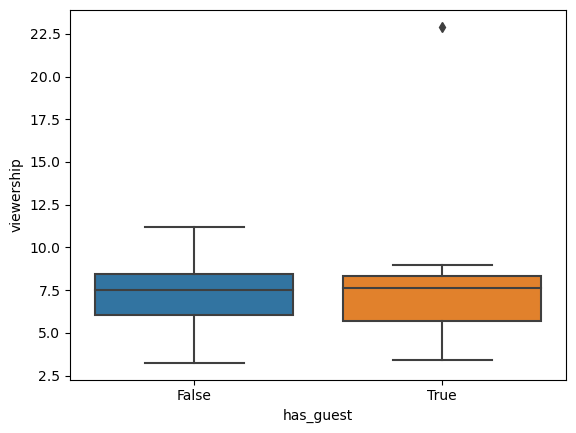

In [92]:
sns.boxplot(y='viewership',x='has_guest',data=df)